In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [3]:
df = pd.read_csv(r'customer_churn_data.csv')

In [4]:
df.shape

(7043, 21)

In [5]:
# inspect columns and values
pd.set_option('display.max_columns', None)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# Check value type is correct
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
# changing all numeric string values to 2 decimal places
mask = pd.to_numeric(df['TotalCharges'], errors='coerce').notnull()
df.loc[mask, 'TotalCharges'] =  df.loc[mask, 'TotalCharges'].astype(float).apply('{:.2f}'.format)

In [8]:
df.TotalCharges

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: object

In [9]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.TotalCharges = df.TotalCharges.astype(float)

In [10]:
df[df.TotalCharges.isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [11]:
# We have no NaN values
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
# drop NaN values, as they were already empty/blank before converting string to float
df.dropna(inplace=True)

In [13]:
df.shape

(7032, 21)

In [14]:
df.Partner.value_counts()

No     3639
Yes    3393
Name: Partner, dtype: int64

In [15]:
df.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [17]:
df.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

In [18]:
df.Contract.value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

In [19]:
df.Churn.value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [20]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Inspect trends and data

Text(0.5, 1.0, 'Clients Gender')

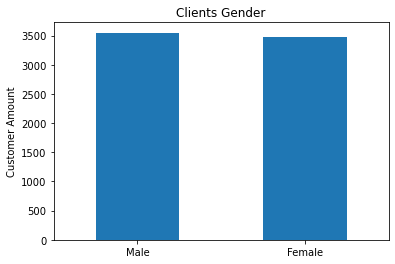

In [78]:
# distribution of Male to Female customers appears normally distributed
gender = df.gender.value_counts()
gender.plot.bar(rot=0)
plt.ylabel('Customer Amount')
plt.title('Clients Gender')

Text(0.5, 1.0, 'Retension vs Churn')

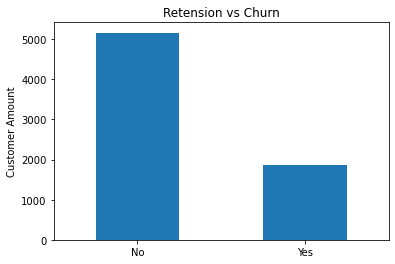

In [77]:
# There are less than half of customers that churn compared to retension
churn_customer = df.Churn.value_counts()
churn_customer.plot.bar(rot=0)
plt.ylabel('Customer Amount')
plt.title('Retension vs Churn')

In [28]:
# Total amount lost from churned 
churn_yes = df[df.Churn == 'Yes']
churn_yes.TotalCharges.sum()

2862926.9

In [29]:
# Total amount customer retension 
churn_no = df[df.Churn == 'No']
churn_no.TotalCharges.sum()

13193241.8

In [30]:
#convert to millions
churn_dollars = df.groupby('Churn').TotalCharges.sum()/1000000
churn_dollars

Churn
No     13.193242
Yes     2.862927
Name: TotalCharges, dtype: float64

Text(0, 0.5, '$ million')

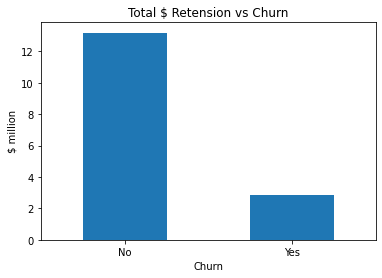

In [31]:
churn_dollars.plot.bar(rot=0)
plt.title('Total $ Retension vs Churn')

plt.ylabel('$ million')

In [32]:
df.tenure.value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: tenure, Length: 72, dtype: int64

Text(0, 0.5, 'Customer Amount')

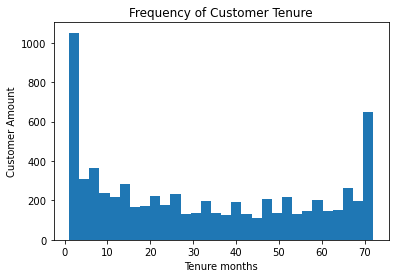

In [76]:
# tenure = num of months with the company.  
plt.hist(df.tenure, bins = 30)
plt.title('Frequency of Customer Tenure')
plt.xlabel('Tenure months')
plt.ylabel('Customer Amount')

In [34]:
# inspecting if total charges has an influence on Churn
total_charges = df.sort_values(by = 'TotalCharges', ascending=False)

In [35]:
total_charges[:10]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4610,2889-FPWRM,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),117.80,8684.80,Yes
4586,7569-NMZYQ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),118.75,8672.45,No
6768,9739-JLPQJ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),117.50,8670.10,No
5347,9788-HNGUT,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),116.95,8594.40,No
2187,8879-XUAHX,Male,0,Yes,No,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,116.25,8564.75,No
6118,9924-JPRMC,Male,0,No,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.20,8547.15,No
5558,0675-NCDYU,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),116.40,8543.25,No
2368,6650-BWFRT,Female,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),117.15,8529.50,No
2603,0164-APGRB,Female,0,No,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,114.90,8496.70,No
2025,1488-PBLJN,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),116.85,8477.70,No


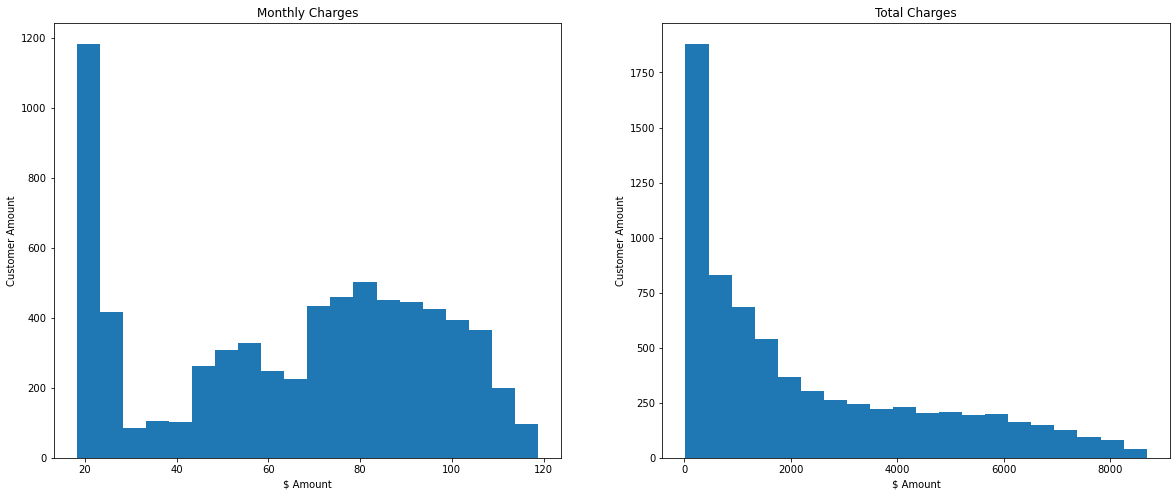

In [75]:
# Inspect the distribution of Monthly Charges and Total Charges

charges = df[['MonthlyCharges', 'TotalCharges']]

fig, ax = plt.subplots(1,2, figsize = (20,8))
                 
ax[0].hist(charges.MonthlyCharges, bins= 20)
ax[0].set_title('Monthly Charges')

ax[1].hist(charges.TotalCharges, bins = 20)
ax[1].set_title('Total Charges')

for ax in ax.flat:
    ax.set(xlabel='$ Amount', ylabel='Customer Amount')

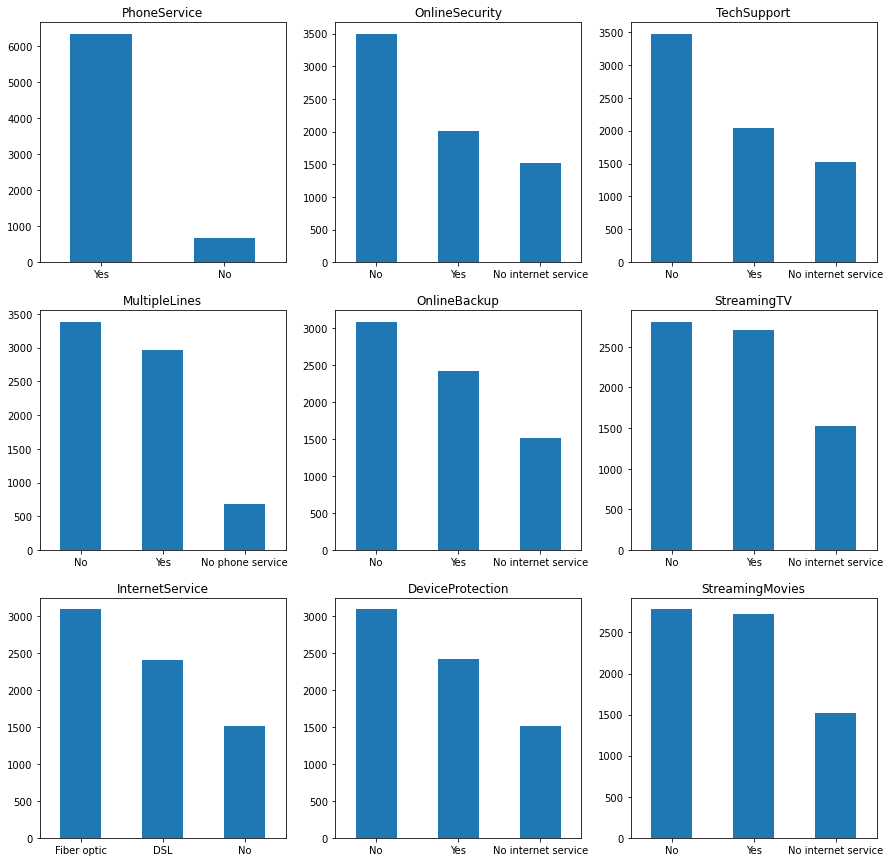

In [68]:
services= ['PhoneService','MultipleLines','InternetService','OnlineSecurity',  'OnlineBackup','DeviceProtection',
           'TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3, figsize = (15,15))

for i, item in enumerate(services):   
    if i < 3:
        ax = df[item].value_counts().plot(
        kind = 'bar',ax=axes[i,0], rot = 0
    elif i >=3 and i < 6:
        ax = df[item].value_counts().plot(
        kind = 'bar',ax=axes[i-3,1], rot = 0)
    elif i < 9:
        ax = df[item].value_counts().plot(
        kind = 'bar',ax=axes[i-6,2], rot = 0)
            
    ax.set_title(item)

In [79]:
# Inspect the distribution of contract types
contracts = df.Contract.value_counts()
contracts

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

Text(0, 0.5, 'Customer Amount')

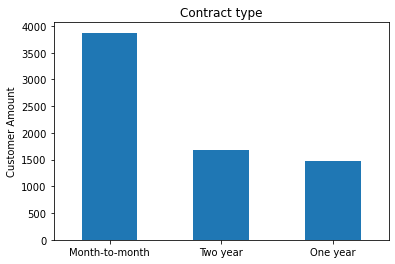

In [80]:
# See that most customers have a month-to-month contract
contracts.plot.bar(rot=0)
plt.title('Contract type')
plt.ylabel('Customer Amount')

In [81]:
contracts_churn = df.groupby(['Contract', 'Churn']).size().unstack().T
contracts_churn

Contract,Month-to-month,One year,Two year
Churn,,,
No,2220,1306,1637
Yes,1655,166,48


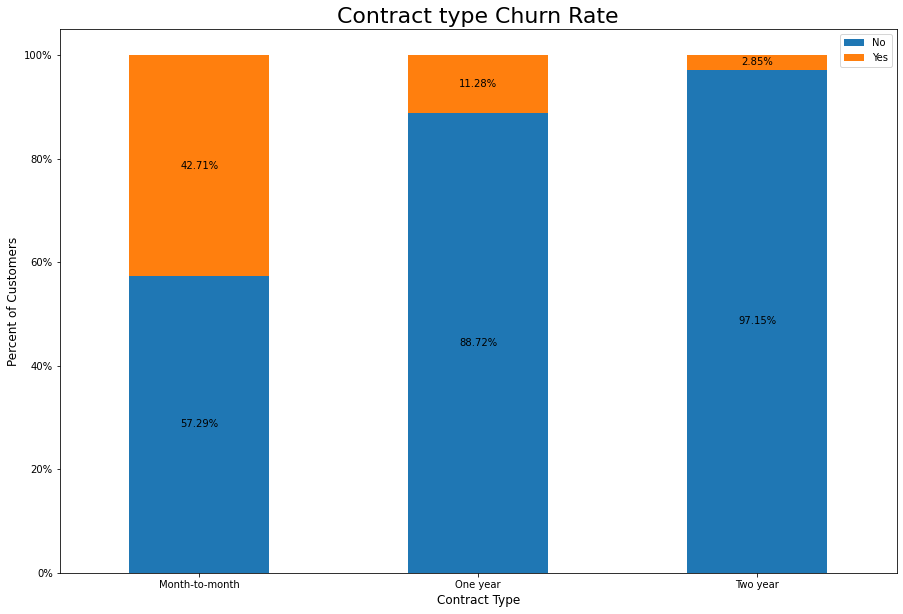

In [82]:
# Month to month contracts have the highest churn rate

import matplotlib.ticker as mtick

ax = (contracts_churn*100.0 / contracts_churn.sum()).T.plot(kind='bar', stacked = True, figsize=(15,10) ,rot = 0)

plt.ylabel('Percent of Customers', fontsize = "large")
plt.xlabel('Contract Type', fontsize = "large")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.title('Contract type Churn Rate', horizontalalignment="center", fontstyle = "normal",
          fontsize = "22", fontfamily = "sans-serif")

plt.legend()

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, y+height/2, '{:.2f}%'.format(height), horizontalalignment='center', verticalalignment='center')

# Export df to SQL database

In [83]:
import getpass
import pymysql
from sqlalchemy import create_engine, inspect

In [84]:
username = 'root'
database = 'telco'
password = getpass.getpass()
server = 'localhost'

········


In [85]:
engine = create_engine(f'mysql+pymysql://{username}:{password}@{server}/{database}')

In [86]:
df.to_sql('customers', engine, index=False, if_exists='replace')

# Label Encoding 

In [87]:
from sklearn.preprocessing import LabelEncoder

In [88]:
df1 = df.copy()

In [90]:
label_encoder = LabelEncoder()

columns = []
for col in df1.columns[1:]:
    if df1[col].dtype == 'object':
        if len(list(df1[col].unique())) <= 2:
            label_encoder.fit(df1[col])
            df1[col] = label_encoder.transform(df1[col])
            columns += [col]
            
print(f'columns encoded: \n{", ".join(columns)}')

columns encoded: 
gender, Partner, Dependents, PhoneService, PaperlessBilling, Churn


In [51]:
df1.dtypes

customerID           object
gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling      int32
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0.5, 0, 'gender'),
  Text(1.5, 0, 'SeniorCitizen'),
  Text(2.5, 0, 'Partner'),
  Text(3.5, 0, 'Dependents'),
  Text(4.5, 0, 'tenure'),
  Text(5.5, 0, 'PhoneService'),
  Text(6.5, 0, 'PaperlessBilling'),
  Text(7.5, 0, 'MonthlyCharges'),
  Text(8.5, 0, 'TotalCharges'),
  Text(9.5, 0, 'Churn')])

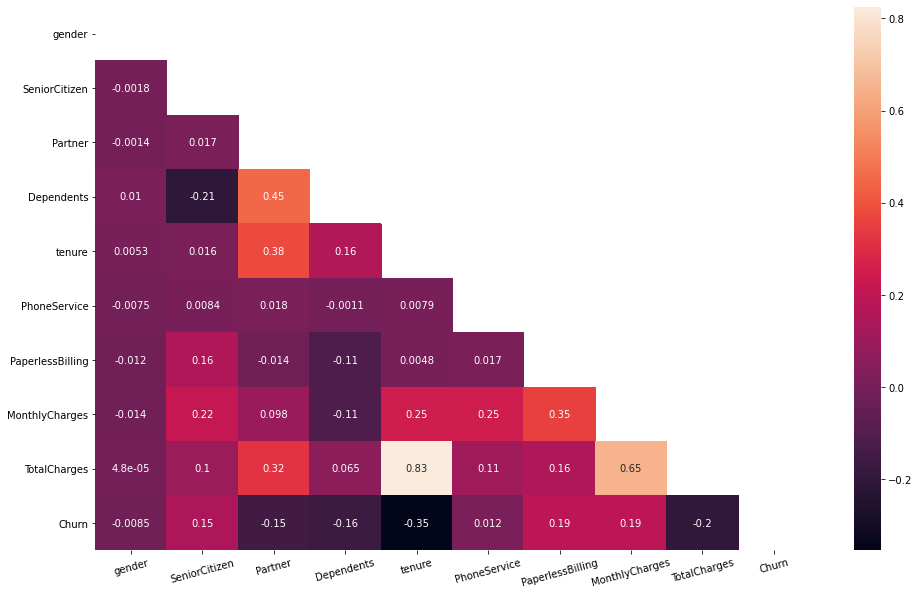

In [52]:
# visual heatmap to view correlations. 
plt.figure(figsize=(16, 10))
mask = np.triu(df1.corr())
sns.heatmap(df1.corr(), annot=True, mask=mask)
plt.xticks(rotation=15) 

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0.5, 0, 'gender'),
  Text(1.5, 0, 'SeniorCitizen'),
  Text(2.5, 0, 'Partner'),
  Text(3.5, 0, 'Dependents'),
  Text(4.5, 0, 'tenure'),
  Text(5.5, 0, 'PhoneService'),
  Text(6.5, 0, 'PaperlessBilling'),
  Text(7.5, 0, 'MonthlyCharges'),
  Text(8.5, 0, 'Churn')])

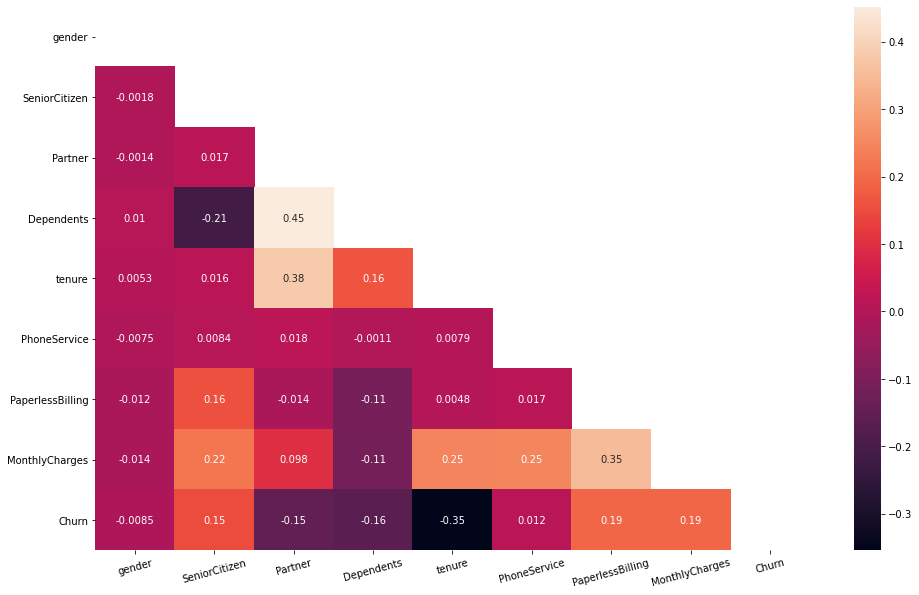

In [54]:
# Dropping total charges as it has high correlation with tenure and monthly charges. 
plt.figure(figsize=(16, 10))
mask = np.triu(df1.drop('TotalCharges', axis=1).corr())
sns.heatmap(df1.drop('TotalCharges', axis=1).corr(), annot=True, mask=mask)
plt.xticks(rotation=15) 

# Get dummies

In [55]:
df1 = df1.drop('TotalCharges', axis=1)

In [56]:
df1.shape

(7032, 20)

In [57]:
df1.OnlineSecurity.value_counts()

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64

In [58]:
df1.StreamingTV.value_counts()

No                     2809
Yes                    2703
No internet service    1520
Name: StreamingTV, dtype: int64

In [59]:
df1[df1.StreamingTV == 'No internet service']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
11,7469-LKBCI,1,0,0,0,16,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,0,Credit card (automatic),18.95,0
16,8191-XWSZG,0,0,0,0,52,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,0,Mailed check,20.65,0
21,1680-VDCWW,1,0,1,0,12,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,0,Bank transfer (automatic),19.80,0
22,1066-JKSGK,1,0,0,0,1,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,0,Mailed check,20.15,1
33,7310-EGVHZ,1,0,0,0,1,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,0,Bank transfer (automatic),20.20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,4807-IZYOZ,0,0,0,0,51,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,0,Bank transfer (automatic),20.65,0
7019,9710-NJERN,0,0,0,0,39,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,0,Mailed check,20.15,0
7020,9837-FWLCH,1,0,1,1,12,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,1,Electronic check,19.20,0
7030,0871-OPBXW,0,0,0,0,2,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,1,Mailed check,20.05,0


In [60]:
df2 = df1.copy()

In [105]:
df2 = pd.get_dummies(df1.drop('customerID', axis=1))

In [204]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


In [205]:
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,1


# Split into Train/Test & Scale

In [118]:
from sklearn.model_selection import train_test_split

In [217]:
X = df2.drop('Churn', axis=1)
y = df1.Churn

In [218]:
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.2,
                                               random_state=7,
                                               stratify=y)

In [210]:
from sklearn.preprocessing import StandardScaler 

In [219]:
ss = StandardScaler()

In [220]:
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

# Models

## Support vector machine

In [221]:
from sklearn.svm import SVC

In [222]:
svc = SVC(kernel = 'linear', random_state = 0)

In [223]:
svc.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [224]:
y_pred = svc.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [225]:
display(confusion_matrix(y_test, y_pred))
print(f'Accuracy: {round(accuracy_score(y_test, y_pred)*100,2)}%')
print(f'Precision: {round(precision_score(y_test, y_pred)*100,2)}%')
print(f'Recall: {round(recall_score(y_test, y_pred)*100,2)}%')
print(f'F1: {round(f1_score(y_test, y_pred)*100,2)}%')

array([[924, 109],
       [157, 217]], dtype=int64)

Accuracy: 81.09%
Precision: 66.56%
Recall: 58.02%
F1: 62.0%


## Random Forest Classifier

In [166]:
from sklearn.ensemble import RandomForestClassifier

In [226]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test) 
display(confusion_matrix(y_test, y_pred))

print(f'Accuracy: {round(accuracy_score(y_test, y_pred)*100,2)}%')
print(f'Precision: {round(precision_score(y_test, y_pred)*100,2)}%')
print(f'Recall: {round(recall_score(y_test, y_pred)*100,2)}%')
print(f'F1: {round(f1_score(y_test, y_pred)*100,2)}%')

array([[938,  95],
       [188, 186]], dtype=int64)

Accuracy: 79.89%
Precision: 66.19%
Recall: 49.73%
F1: 56.79%


## Logistic Regression

In [228]:
from sklearn.linear_model import LogisticRegression

In [235]:
lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)  

display(confusion_matrix(y_test, y_pred))
print(f'Accuracy: {round(accuracy_score(y_test, y_pred)*100,2)}%')
print(f'Precision: {round(precision_score(y_test, y_pred)*100,2)}%')
print(f'Recall: {round(recall_score(y_test, y_pred)*100,2)}%')
print(f'F1: {round(f1_score(y_test, y_pred)*100,2)}%')

array([[766, 267],
       [ 71, 303]], dtype=int64)

Accuracy: 75.98%
Precision: 53.16%
Recall: 81.02%
F1: 64.19%


## KNeighborsClassifier

In [236]:
from sklearn.neighbors import KNeighborsClassifier

In [240]:
knc = KNeighborsClassifier(5)
knc.fit(X_train, y_train)
y_pred = knc.predict(X_test)  

display(confusion_matrix(y_test, y_pred))
print(f'Accuracy: {round(accuracy_score(y_test, y_pred)*100,2)}%')
print(f'Precision: {round(precision_score(y_test, y_pred)*100,2)}%')
print(f'Recall: {round(recall_score(y_test, y_pred)*100,2)}%')
print(f'F1: {round(f1_score(y_test, y_pred)*100,2)}%')

array([[880, 153],
       [194, 180]], dtype=int64)

Accuracy: 75.34%
Precision: 54.05%
Recall: 48.13%
F1: 50.92%


## Naive Bayes

In [241]:
from sklearn.naive_bayes import GaussianNB

In [244]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)  

display(confusion_matrix(y_test, y_pred))
print(f'Accuracy: {round(accuracy_score(y_test, y_pred)*100,2)}%')
print(f'Precision: {round(precision_score(y_test, y_pred)*100,2)}%')
print(f'Recall: {round(recall_score(y_test, y_pred)*100,2)}%')
print(f'F1: {round(f1_score(y_test, y_pred)*100,2)}%')

array([[657, 376],
       [ 49, 325]], dtype=int64)

Accuracy: 69.79%
Precision: 46.36%
Recall: 86.9%
F1: 60.47%


## Decision Tree Classifier - balanced

In [248]:
from sklearn.tree import DecisionTreeClassifier

In [249]:
dtc = DecisionTreeClassifier(class_weight='balanced')
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test) 

display(confusion_matrix(y_test, y_pred))
print(f'Accuracy: {round(accuracy_score(y_test, y_pred)*100,2)}%')
print(f'Precision: {round(precision_score(y_test, y_pred)*100,2)}%')
print(f'Recall: {round(recall_score(y_test, y_pred)*100,2)}%')
print(f'F1: {round(f1_score(y_test, y_pred)*100,2)}%')

array([[853, 180],
       [177, 197]], dtype=int64)

Accuracy: 74.63%
Precision: 52.25%
Recall: 52.67%
F1: 52.46%


## Random Forest Classifier

In [250]:
from sklearn.ensemble import RandomForestClassifier

In [254]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)  

display(confusion_matrix(y_test, y_pred))
print(f'Accuracy: {round(accuracy_score(y_test, y_pred)*100,2)}%')
print(f'Precision: {round(precision_score(y_test, y_pred)*100,2)}%')
print(f'Recall: {round(recall_score(y_test, y_pred)*100,2)}%')
print(f'F1: {round(f1_score(y_test, y_pred)*100,2)}%')

array([[933, 100],
       [187, 187]], dtype=int64)

Accuracy: 79.6%
Precision: 65.16%
Recall: 50.0%
F1: 56.58%
